# Importing Necessary Packages

In [1]:
#packages for data data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
# Importing Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from keras.models import Sequential
from keras.layers import Dense, LSTM,Bidirectional
# Importing evaluation modules
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
#data scalling
from sklearn.preprocessing import MinMaxScaler
minmax_scaler=MinMaxScaler()


# Reading the Data

In [2]:
df = pd.read_excel('(미디어에버) BioParticle Counter 6개월 측정 20230314.xlsx',
                   sheet_name='data',
                  header=1)

# Data Preparation

### Dropping Un-necessary Columns

In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.dropna(axis=0,inplace=True)

In [4]:
df['Dust']=df['Dust'].astype(int)
df['Bio']=df['Bio'].astype(int)

In [5]:
df['Date_Time']=df['Day'].astype(str)+' '+df['Time'].astype(str)
df['Date_Time'] = pd.to_datetime(df['Date_Time'])

# Data Visualizations

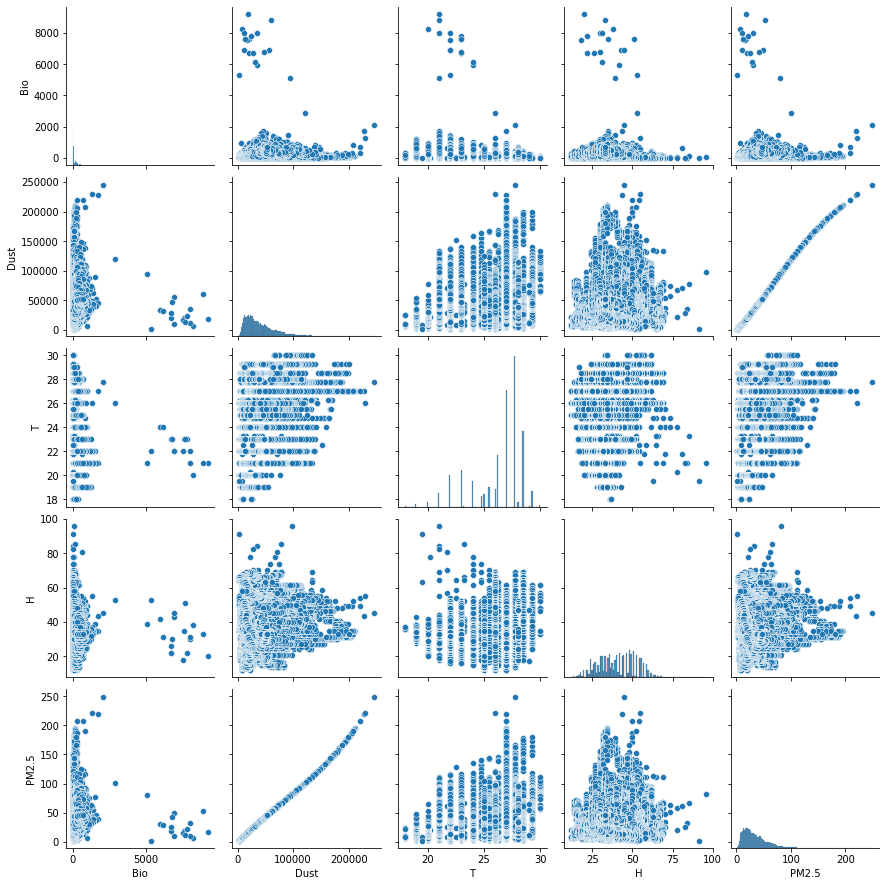

In [6]:
sns.pairplot(df)

# Feature Engineering

In [7]:
df['Date_Time'] =df['Date_Time'].values.astype(np.int64) // 10 ** 9
df.drop(['Day','Time'],axis=1,inplace=True)

### Features Correlation

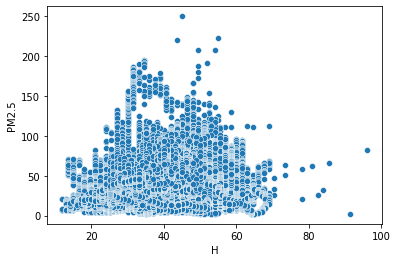

Pearson Correlation : 0.09812844081702435


In [8]:
sns.scatterplot(x=df['H'],y=df['PM2.5'])
plt.xlabel('H')
plt.ylabel('PM2.5')
plt.show()
print('Pearson Correlation :',np.corrcoef(df['H'],df['PM2.5'])[0][1])

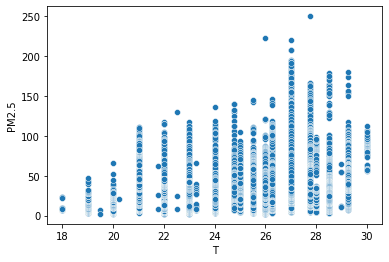

Pearson Correlation : 0.11350918067415086


In [9]:
sns.scatterplot(x=df['T'],y=df['PM2.5'])
plt.xlabel('T')
plt.ylabel('PM2.5')
plt.show()
print('Pearson Correlation :',np.corrcoef(df['T'],df['PM2.5'])[0][1])

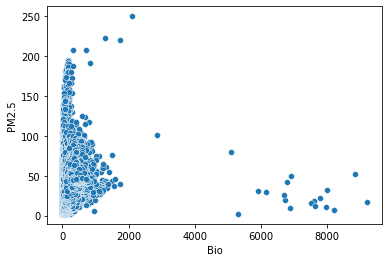

Pearson Correlation : 0.11075081066413414


In [10]:
sns.scatterplot(x=df['Bio'],y=df['PM2.5'])
plt.xlabel('Bio')
plt.ylabel('PM2.5')
plt.show()
print('Pearson Correlation :',np.corrcoef(df['Bio'],df['PM2.5'])[0][1])

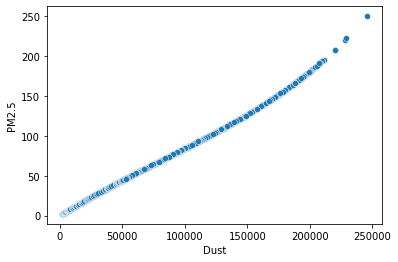

Pearson Correlation : 0.999415875119069


In [11]:
sns.scatterplot(x=df['Dust'],y=df['PM2.5'])
plt.xlabel('Dust')
plt.ylabel('PM2.5')
plt.show()
np.corrcoef(df['Dust'],df['PM2.5'])[0][1]
print('Pearson Correlation :',np.corrcoef(df['Dust'],df['PM2.5'])[0][1])

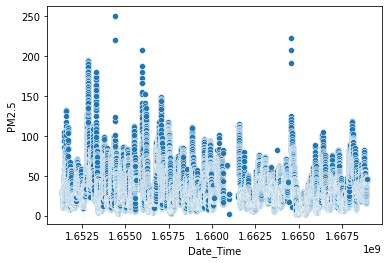

Pearson Correlation : -0.10511572055576339


In [12]:
sns.scatterplot(x=df['Date_Time'],y=df['PM2.5'])
plt.xlabel('Date_Time')
plt.ylabel('PM2.5')
plt.show()
print('Pearson Correlation :',np.corrcoef(df['Date_Time'],df['PM2.5'])[0][1])

In [13]:
X=df.drop('PM2.5',axis=1)
y=df['PM2.5']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Permutation Importance

In [15]:
models = []
models.append(('Ridge', Ridge()))
models.append(('LinearRegression', LinearRegression()))
models.append(('KNeighborsRegressor', KNeighborsRegressor()))
#models.append(('Random Forest', RandomForestRegressor()))
models.append(('Decision Tree', DecisionTreeRegressor()))
models.append(('SGD Regressor', SGDRegressor()))
#models.append(('SV Regressor', SVR()))

In [16]:
permutation_imp={}

In [17]:
for name,model in models:
    regressor=model
    regressor.fit(X, y)
    # Calculate Permutation Importance
    result = permutation_importance(regressor, X_test, y_test, scoring='neg_mean_squared_error',n_repeats=10)

    # Access the importance scores
    importance_scores = result.importances_mean
    permutation_imp[model]=importance_scores


In [18]:
permutation_imp_score=pd.DataFrame(permutation_imp,X.columns)
permutation_imp_score

,Ridge(),LinearRegression(),KNeighborsRegressor(),DecisionTreeRegressor(),SGDRegressor()
Bio,0.014451,0.013871,0.000038,0.000083,-7.069366e+39
Dust,1037.034493,1032.195742,389.649480,1033.768778,-7.444085e+42
T,0.005759,0.006004,0.000000,0.000027,5.104236e+37
H,0.007222,0.006891,0.000000,0.000061,8.507059e+37
Date_Time,-0.000003,-0.000006,311.128691,0.000128,-7.524749e+42


In [19]:
# selecting on relevant features

In [70]:
X=df.Dust
y=df['PM2.5']

In [71]:
X=X.values.reshape(X.shape[0],1)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
#X_train=X_train.values.reshape(X_train.shape[0],1)
#X_test=X_test.values.reshape(X_test.shape[0],1)

# Willmote Index

In [73]:
def willmott_index(observed, predicted):
    mean_observed = np.mean(observed)
    numerator = np.sum(np.abs(observed - predicted))
    denominator = np.sum(np.abs(observed - mean_observed))
    wi = (1 - (numerator / denominator))
    return wi

In [74]:
train_l = []
test_l = []
mae_l = []
rmse_l = []
r2_l = []
wi_l = []
cv_scores=[]

In [75]:
models_names=['Ridge','LR','KNN Regressor','RF Regressor','DT Regressor','SGD Regressor']
              #'SV Regressor']

+ ==================================================================================================== +
			1-For Ridge The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  0.811942135052065
--------------------------------------------------
Mean absolute error (MAE) :  0.49158731126024396
--------------------------------------------------
R2 score :  0.9987211237706674
--------------------------------------------------
CV Score :  [0.99796598 0.99900774 0.99927858 0.99871086 0.9991162 ]
--------------------------------------------------
Willmott's Index: 0.9718194823092212
--------------------------------------------------


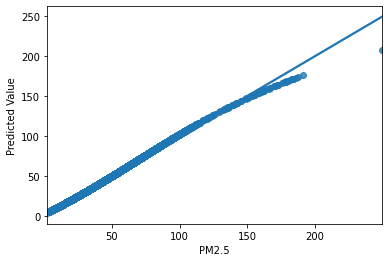

							-----------------------------------------------------------
							 Time for detection (Ridge) : 1.962 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For LinearRegression The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  0.8119421350520517
--------------------------------------------------
Mean absolute error (MAE) :  0.49158731126024746
--------------------------------------------------
R2 score :  0.9987211237706674
--------------------------------------------------
CV Score :  [0.99796598 0.99900774 0.99927858 0.99871086 0.9991162 ]
--------------------------------------------------
Willmott's Index: 0.971819482309221
--------------------------------------------------


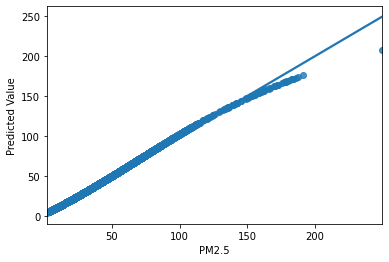

							-----------------------------------------------------------
							 Time for detection (LinearRegression) : 2.385 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			3-For KNeighborsRegressor The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  0.31113140810462986
--------------------------------------------------
Mean absolute error (MAE) :  0.005213122996669109
--------------------------------------------------
R2 score :  0.999812212765832
--------------------------------------------------
CV Score :  [0.99965561 0.99999922 0.99999994 0.99997276 0.99999994]
--------------------------------------------------
Willmott's Index: 0.9997011548071588
--------------------------------------------------


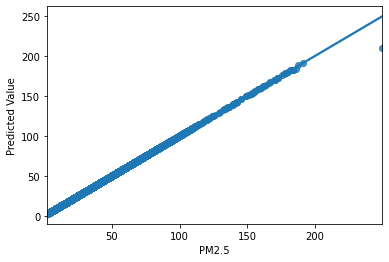

							-----------------------------------------------------------
							 Time for detection (KNeighborsRegressor) : 2.435 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			4-For Random Forest The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  0.2416473028245353
--------------------------------------------------
Mean absolute error (MAE) :  0.003585658349570063
--------------------------------------------------
R2 score :  0.9998867228638818
--------------------------------------------------
CV Score :  [0.99981957 0.99999891 0.99999997 0.99998769 0.99999998]
--------------------------------------------------
Willmott's Index: 0.9997944501287185
--------------------------------------------------


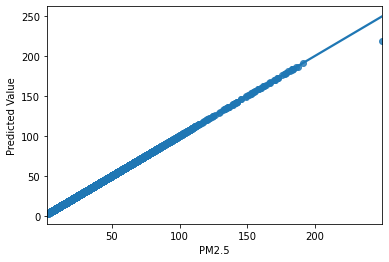

							-----------------------------------------------------------
							 Time for detection (Random Forest) : 56.536 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			5-For Decision Tree The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  0.22067336670899873
--------------------------------------------------
Mean absolute error (MAE) :  0.0036313870906920687
--------------------------------------------------
R2 score :  0.9999055334188064
--------------------------------------------------
CV Score :  [0.9998161  0.99999904 0.99999996 0.99999766 0.99999997]
--------------------------------------------------
Willmott's Index: 0.9997918287030457
--------------------------------------------------


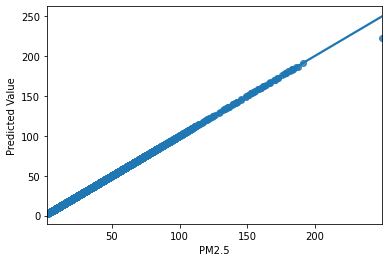

							-----------------------------------------------------------
							 Time for detection (Decision Tree) : 2.227 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			6-For SGD Regressor The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  4.6662481781411014e+17
--------------------------------------------------
Mean absolute error (MAE) :  3.847371663703558e+17
--------------------------------------------------
R2 score :  -4.2239038456545874e+32
--------------------------------------------------
CV Score :  [-2.15145253e+32 -3.43235694e+30 -1.04656311e+32 -1.63443897e+31
 -4.60914320e+32]
--------------------------------------------------
Willmott's Index: -2.2055273345857732e+16
--------------------------------------------------


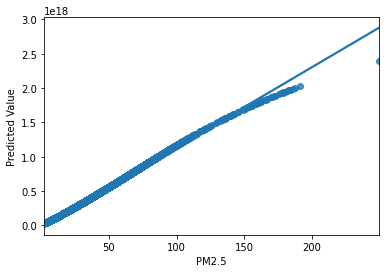

							-----------------------------------------------------------
							 Time for detection (SGD Regressor) : 7.042 seconds...
							-----------------------------------------------------------



In [80]:
# check the performance on diffrent regressor
models = []
models.append(('Ridge', Ridge()))
models.append(('LinearRegression', LinearRegression()))
models.append(('KNeighborsRegressor', KNeighborsRegressor()))
models.append(('Random Forest', RandomForestRegressor()))
models.append(('Decision Tree', DecisionTreeRegressor()))
models.append(('SGD Regressor', SGDRegressor()))
#models.append(('SV Regressor', SVR()))


train_l = []
test_l = []
mae_l = []
rmse_l = []
r2_l = []
wi_l = []
cv_scores=[]

import time
i = 0
for name,model in models:
    i = i+1
    start_time = time.time()
    
    # Fitting model to the Training set
    clf = model
    clf.fit(X_train, y_train)
    
    # Scores of model
    train = model.score(X_train, y_train)
    test = model.score(X_test, y_test)
    
    train_l.append(train)
    test_l.append(test)
    
    # predict values
    predictions = clf.predict(X_test)
    # RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_l.append(rmse)
    # MAE
    mae = mean_absolute_error(y_test,predictions)
    mae_l.append(mae)
    # R2 score
    r2 = r2_score(y_test,predictions)
    r2_l.append(r2)
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    cv_scores.append(scores)


    print("+","="*100,"+")
    print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
    print("+","="*100,"+")
    print('Root mean squared error (RMSE) : ', rmse)   
    print("-"*50)
    print('Mean absolute error (MAE) : ', mae)
    print("-"*50)
    print('R2 score : ', r2)
    print("-"*50)
    print('CV Score : ', scores)
    print("-"*50)
    wi = willmott_index(y_test, predictions)
    print(f"Willmott's Index: {wi}")
    wi_l.append(wi)
    print("-"*50)
    wi = willmott_index(y_test, predictions)
    
    
    sns.regplot(x=y_test,y=predictions)
    plt.ylabel("Predicted Value")
    plt.show()
        
        
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print()
    


In [81]:
report = pd.DataFrame({"Model": models_names,
                     "Training Score": train_l,
                     "Testing Score": test_l, "MAE": mae_l,
                     "RMSE": rmse_l,
                     "R2 Score": r2_l,
                    "Willmot Index": wi_l})
report

,Model,Training Score,Testing Score,MAE,RMSE,R2 Score,Willmot Index
0,Ridge,9.988697e-01,9.987211e-01,4.915873e-01,8.119421e-01,9.987211e-01,9.718195e-01
1,LR,9.988697e-01,9.987211e-01,4.915873e-01,8.119421e-01,9.987211e-01,9.718195e-01
2,KNN Regressor,9.999894e-01,9.998122e-01,5.213123e-03,3.111314e-01,9.998122e-01,9.997012e-01
3,RF Regressor,9.999995e-01,9.998867e-01,3.585658e-03,2.416473e-01,9.998867e-01,9.997945e-01
4,DT Regressor,1.000000e+00,9.999055e-01,3.631387e-03,2.206734e-01,9.999055e-01,9.997918e-01
5,SGD Regressor,-4.261874e+32,-4.223904e+32,3.847372e+17,4.666248e+17,-4.223904e+32,-2.205527e+16


# LSTM and BiLSTM

In [29]:
# Reshape the input data to match LSTM layer input shape
train_data = np.resize(X_train, (X_train.shape[0], X_train.shape[1], 1))
test_data = np.resize(X_test, (X_test.shape[0], X_test.shape[1], 1))
train_labels=y_train
test_labels=y_test

# LSTM

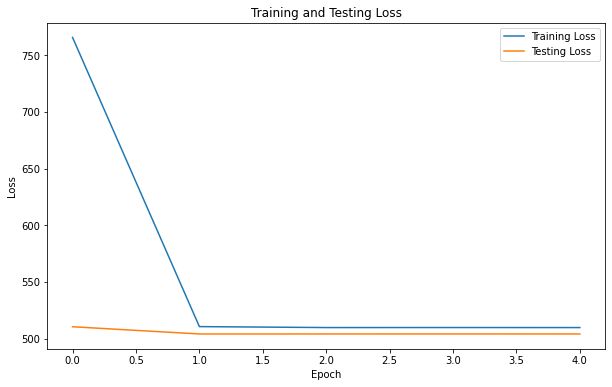

Evaluation Metrics LSTM:
Test MSE: 504.0236004337588
Test RMSE: 22.450469937926886
Test MAE: 17.27381503720739
Test R^2: -5e-05


In [59]:
# Define LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(64, input_shape=(train_data.shape[1], train_data.shape[2]),return_sequences=True))  # LSTM layer with 64 units
    model.add(LSTM(32, return_sequences=True))
    model.add(Dense(1))
    return model

# Define BiLSTM model
def create_bilstm_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(128), input_shape=(train_data.shape[1], train_data.shape[2])))
    model.add(Dense(1))
    return model

# Define evaluation metrics
def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2
    
# Create and compile LSTM model
model = create_lstm_model()
model.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM model
history=model.fit(train_data, train_labels, epochs=5, batch_size=32, verbose=0,
                  validation_data=(test_data, test_labels))
#cv_scores = cross_val_score(model, train_data, train_labels, cv=5, scoring=scoring)

# Extract training and testing losses from history
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Plot training and testing losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()

# Evaluate LSTM model on validation data
y_val_pred = model.predict(test_data)
y_val_pred = y_val_pred.reshape(y_val_pred.shape[0],y_val_pred.shape[1]*y_val_pred.shape[2])
mse, rmse, mae, r2 = evaluate_regression(test_labels, y_val_pred)


print("Evaluation Metrics LSTM:")
print("Test MSE:", mse)
print("Test RMSE:", rmse)
print("Test MAE:", mae)
print("Test R^2:", round(r2,5))

# BiLSTM

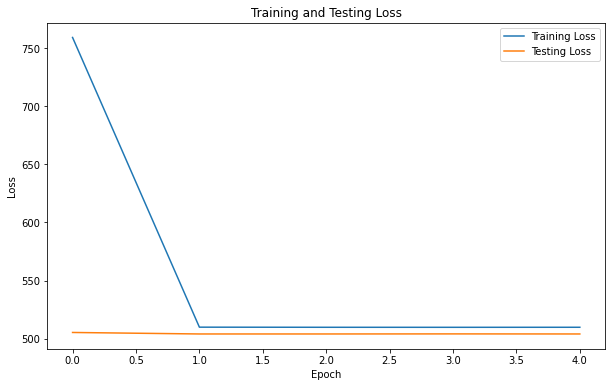

Evaluation Metrics LSTM:
Test MSE: 504.00126766598765
Test RMSE: 22.44997255379141
Test MAE: 17.23717877824649
Test R^2: -0.0


In [63]:
# Create and compile BiLSTM model
model = create_bilstm_model()
model.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM model
history=model.fit(train_data, train_labels, epochs=5, batch_size=32, verbose=0,
                  validation_data=(test_data, test_labels))
#cv_scores = cross_val_score(model, train_data, train_labels, cv=5, scoring=scoring)

# Extract training and testing losses from history
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Plot training and testing losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()

# Evaluate LSTM model on validation data
y_val_pred = model.predict(test_data)
#y_val_pred = y_val_pred.reshape(y_val_pred.shape[0],y_val_pred.shape[1]*y_val_pred.shape[2])
mse, rmse, mae, r2 = evaluate_regression(test_labels, y_val_pred)


print("Evaluation Metrics LSTM:")
print("Test MSE:", mse)
print("Test RMSE:", rmse)
print("Test MAE:", mae)
print("Test R^2:", round(r2,5))

In [64]:
X=np.concatenate((train_data, test_data), axis=0)

In [65]:
y=np.concatenate((train_labels, test_labels), axis=0)

# LSTM Cross Validation

In [68]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
mae_l = []
mse_l=[]
rmse_l = []
r2_l = []
wi_l = []
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = create_lstm_model()
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    # Evaluate LSTM model on validation data
    y_pred = model.predict(X_test)
    y_pred = y_pred.reshape(y_pred.shape[0],y_pred.shape[1]*y_pred.shape[2])
    mse, rmse, mae, r2 = evaluate_regression(y_test, y_pred)
    wi=willmott_index(y_test,y_pred)
    mae_l.append(mae)
    mse_l.append(mse)
    rmse_l.append(rmse)
    r2_l.append(r2)
    wi_l.append(wi)

print("Cross Validation MSE:",np.mean(mse_l))
print("Cross Validation RMSE:",np.mean(rmse_l))
print("Cross Validation MAE:",np.mean(mae_l))
print("Cross Validation R2:",np.mean(r2_l))
print("Cross Validation WI:",np.mean(wi_l))

Cross Validation MSE: 508.3003641319332
Cross Validation RMSE: 22.545436641979144
Cross Validation MAE: 17.34643829134619
Cross Validation R2: -0.0001543297454155379
Cross Validation WI: -12744.6917315667


# BiLSTM Cross Validation

In [69]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
mae_l = []
mse_l=[]
rmse_l = []
r2_l = []
wi_l = []
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = create_bilstm_model()
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    # Evaluate LSTM model on validation data
    y_pred = model.predict(X_test)
    #y_pred = y_pred.reshape(y_pred.shape[0],y_pred.shape[1]*y_pred.shape[2])
    mse, rmse, mae, r2 = evaluate_regression(y_test, y_pred)
    wi=willmott_index(y_test,y_pred)
    mae_l.append(mae)
    mse_l.append(mse)
    rmse_l.append(rmse)
    r2_l.append(r2)
    wi_l.append(wi)

print("Cross Validation MSE:",np.mean(mse_l))
print("Cross Validation RMSE:",np.mean(rmse_l))
print("Cross Validation MAE:",np.mean(mae_l))
print("Cross Validation R2:",np.mean(r2_l))
print("Cross Validation WI:",np.mean(wi_l))

Cross Validation MSE: 508.28074521392466
Cross Validation RMSE: 22.54500325295141
Cross Validation MAE: 17.346861806660932
Cross Validation R2: -0.00011602568759641052
Cross Validation WI: -12745.162033677061
